In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mne

%matplotlib widget

In [42]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_raw.fif')

In [43]:
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True, verbose=False)

[Layouts](https://mne.tools/stable/generated/mne.channels.Layout.html#mne.channels.Layout) give sensor positions in 2 dimensions (defined by `x`, `y`, `width` and `height` values for each sensor) and are mostly used for illustrative purposes.

[Montages](https://mne.tools/stable/generated/mne.channels.DigMontage.html#mne.channels.DigMontage) contain sensor positions in 3D (`x`,`y`, `z`, in meters).

In [44]:
data_dir = os.path.join(os.path.dirname(mne.__file__), 'channels', 'data')
for subfolder in ['layouts', 'montages']:
    print(f'\n BUILT-IN {subfolder[:-1].upper()} FILES')
    print('=============')
    print(sorted(os.listdir(os.path.join(data_dir, subfolder))))


 BUILT-IN LAYOUT FILES
['CTF-275.lout', 'CTF151.lay', 'CTF275.lay', 'EEG1005.lay', 'EGI256.lout', 'KIT-125.lout', 'KIT-157.lout', 'KIT-160.lay', 'KIT-AD.lout', 'KIT-AS-2008.lout', 'KIT-UMD-3.lout', 'Neuromag_122.lout', 'Vectorview-all.lout', 'Vectorview-grad.lout', 'Vectorview-grad_norm.lout', 'Vectorview-mag.lout', 'biosemi.lay', 'magnesWH3600.lout']

 BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


## Working with layout files

FigureCanvasNbAgg()

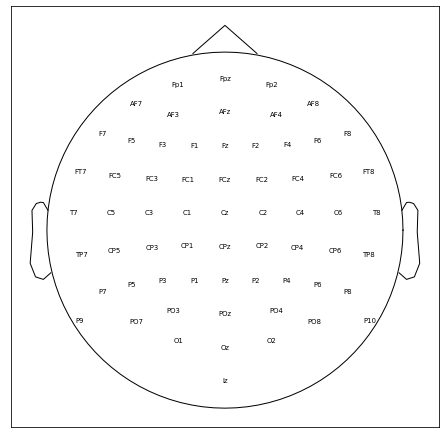

In [45]:
biosemi_layout = mne.channels.read_layout('biosemi')
biosemi_layout.plot();

FigureCanvasNbAgg()

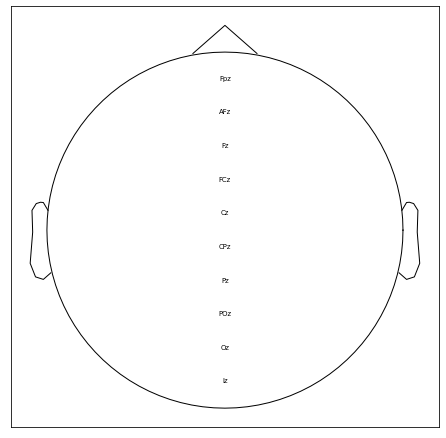

In [46]:
midline = np.where([name.endswith('z') for name in biosemi_layout.names])[0]
biosemi_layout.plot(picks=midline);

FigureCanvasNbAgg()

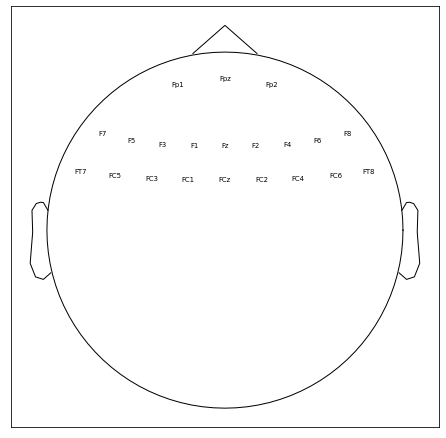

In [47]:
frontal = np.where([name.startswith('F') for name in biosemi_layout.names])[0]
biosemi_layout.plot(picks=frontal);

FigureCanvasNbAgg()

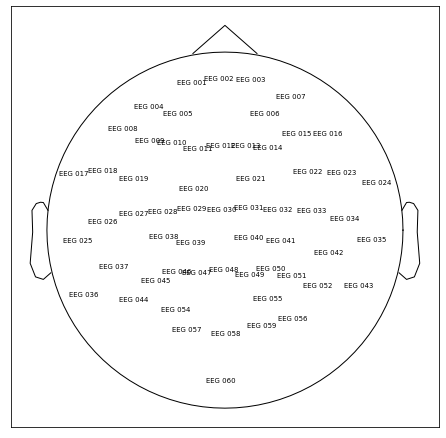

In [48]:
mne.channels.make_eeg_layout(raw.info).plot();

## Working with montage files

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


FigureCanvasNbAgg()

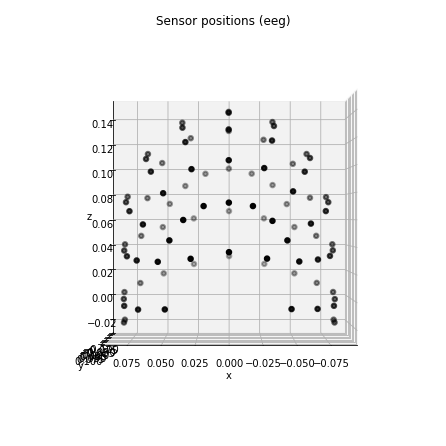

In [49]:
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
ten_twenty_montage.plot(show_names=False);

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


FigureCanvasNbAgg()

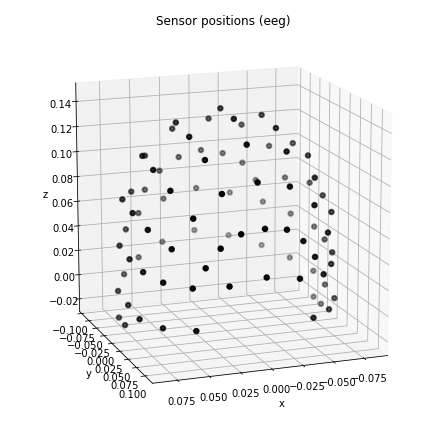

In [50]:
fig = ten_twenty_montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15);

FigureCanvasNbAgg()

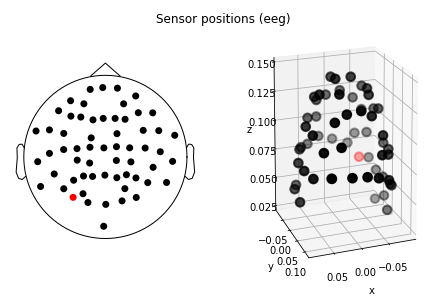

In [54]:
fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection='3d')
raw.plot_sensors(ch_type='eeg', axes=ax2d)
raw.plot_sensors(ch_type='eeg', axes=ax3d, kind='3d')
ax3d.view_init(azim=70, elev=15);

## Rendering sensor position with mayavi

In [ ]:
fig = mne.viz.plot_alignment(raw.info, trans=None, dig=False, eeg=False, surfaces=[], meg=['helmet', 'sensors'], coord_frame='meg')
mne.viz.set_3d_view(fig, azimuth=50, elevation=90, distance=0.5);

Getting helmet for system 306m
